<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Previous-experiment" data-toc-modified-id="Previous-experiment-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Previous experiment</a></span></li></ul></li></ul></div>

This notebook is to enable line search. We will use this notebook exclusively to debug the implementation of line search on a single instance of the graph. 

# Load

In [8]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list
from amod_ed.result_analysis import plot_stop_and_cost

from amod_ed.FW_OuterUpdate import FW_graph_extension

## Previous experiment

We load a previous experiment just to have the graphs etc. 

In [9]:
subfolder = 'unstucking_balance'

In [10]:
n_nodes=2

In [11]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [12]:
print(os.listdir(path))

['output_L_10000_ni_15_no_20_ev_0_relative_progress_fu_False.pkl', 'new_init.pkl', 'initial_setup.pkl', 'new_init_with_step.pkl', 'line_search.pkl']


In [13]:
filename=os.listdir(path)[-1]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance1, opt_res1, OD_list, balance_list1, params = pickle.load(f)

line_search.pkl


In [14]:
params

{'L': 10000,
 'ni': 15,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

In [79]:
G_ref = G_FW1[0]
ri_ref = ri_FW1[2]

In [80]:
ri_ref

{'0': 6.0008644329773, '0_p': 0.0, '1': -6.0008644329773, '1_p': 0.0, 'R': 0.0}

We are going to solve only the inner iterations, as they are the ones causing problems

In [73]:
edge_list =[]
for e in G_ref.edges():
    edge_list.append(e)

In [100]:
G_list, y_list, opt_res, OD_list, i, balance_list = FW_graph_extension(G_ref, OD, edge_list, ri_ref, FW_tol=0,
                       step='line_search', evolving_bounds=False, max_iter=30,
                       stopping_criterion='relative_progress', update_factor=1.1, i_offset = 0)

Initialization problem status:  optimal
Status of line search problem :  optimal_inaccurate
0.36327332297175324
Status of line search problem :  optimal_inaccurate
0.9997112926376435
Status of line search problem :  optimal_inaccurate
0.22133132041745116
Status of line search problem :  optimal_inaccurate
0.10281475369120165
Status of line search problem :  optimal_inaccurate
0.16110462750975071
Status of line search problem :  optimal_inaccurate
0.05822633943683867
Status of line search problem :  optimal_inaccurate
0.07526996533672907
Status of line search problem :  optimal_inaccurate
0.029832700475392576
Status of line search problem :  optimal_inaccurate
0.04793763371265955
Status of line search problem :  optimal_inaccurate
0.08892700163806065
Status of line search problem :  optimal_inaccurate
0.18421620293356905
Status of line search problem :  optimal_inaccurate
0.012168715652308213
Status of line search problem :  optimal_inaccurate
4.482135641534642e-06
Status of line search

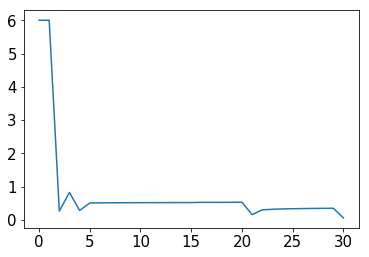

In [93]:
plt.plot(balance_list)

this might be one of the reasons we see bumps : the scale (because we do not initialize very well). 

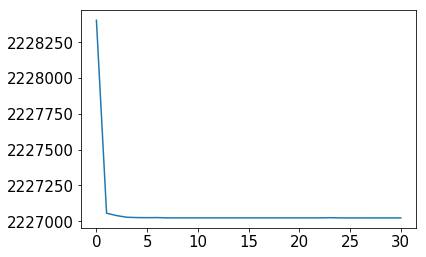

In [83]:
plt.plot(opt_res['obj'])
# plt.yscale('log')

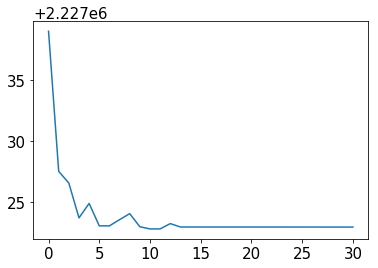

In [76]:
plt.plot(opt_res['obj'])
# plt.yscale('log')

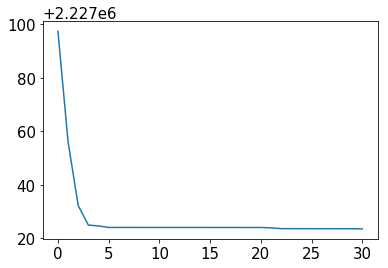

In [94]:
plt.plot(opt_res['obj'])
# plt.yscale('log')

In [96]:
G_ = G_list[-1]

In [98]:
for e in G_.edges():
    print(G_[e[0]][e[1]]['f_m'])
    print(type(G_[e[0]][e[1]]['f_m']))

8.640235368882333
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
2.6969300619585677
<class 'numpy.float64'>
1.3597646311176654
<class 'numpy.float64'>
2.6969300619585677
<class 'numpy.float64'>
0.0
<class 'numpy.float64'>
8.640235368882333
<class 'numpy.float64'>
7.3030699380414275
<class 'numpy.float64'>
